<a href="https://colab.research.google.com/github/aakashpaul-2/Machine-Learning-Projects/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4 Guidance

This notebook is a template for module 4b and 4c, which will be tested in Google Colab, your code needs to run there.
The structure has been provided to improve consistency and make it easier for markers to understand your code but still give students the flexibility to be creative.  You need to populate the required functions to solve this problem.  All dependencies should be documented in the next cell.

You can:
    add further cells or text blocks to extend or further explain your solution
    add further functions

Dont:
    rename functions
   

In [ ]:
# Fixed dependencies - do not remove or change.
import pytest
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive/')

# Import your dependencies
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


Mounted at /content/gdrive/


In [ ]:
# Import data

def import_local_data(file_path):
    raw_df = pd.read_excel(file_path)
    return raw_df

In [ ]:
local_file_path = "/content/gdrive/My Drive/Colab_Notebooks/Challenges/breast-cancer.xls"

In [ ]:
!ls

gdrive	sample_data


In [ ]:
# Dont change
raw_data = import_local_data(local_file_path)

### Conduct exploratory data analysis and explain your key findings - Examine the data, explain its key features and what they look like.  Highlight any fields that are anomalous.

In [ ]:
raw_data.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,2019-05-03 00:00:00,yes,2,left,right_up,no,recurrence-events


In [ ]:
# Analysing each column in detail

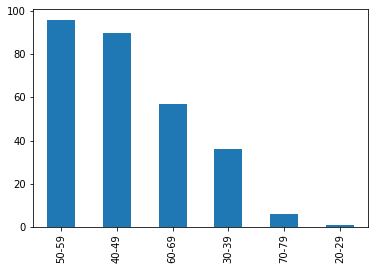

In [ ]:
raw_data['age'].value_counts().plot.bar()
# 6 different age groups found (i.e. 6 distinct values). Age group with the most data seems to be between 40-59
# Approach is to use dummy variables to represent each age group as more than 2 categories present

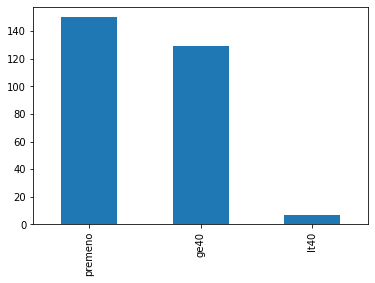

In [ ]:
raw_data['menopause'].value_counts().plot.bar()
# 3 different menopause categories found (i.e. 3 distinct values). Very few with lt40
# Approach is to use dummy variables to represent each menopause category as more than 2 categories present

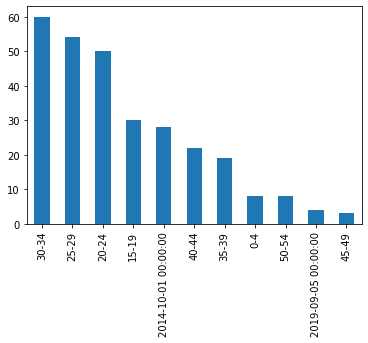

In [ ]:
raw_data['tumor-size'].value_counts().plot.bar()
# 9 different tumor-size categories found (i.e. 9 distinct values).
# two distinct datetime values with tumor-size values - errors within the dataset and needs to be cleaned
df_tumor_values = raw_data['tumor-size'].value_counts().index
df_tumor_values_timestamp_1 = df_tumor_values[4]
df_tumor_values_timestamp_2 = df_tumor_values[9]

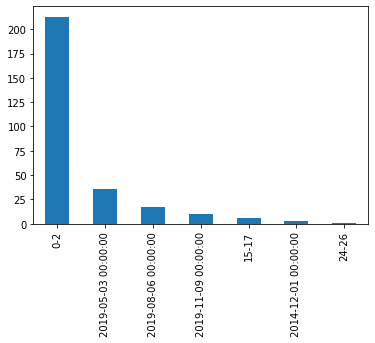

In [ ]:
raw_data['inv-nodes'].value_counts().plot.bar()
# several date values within this column
# majority of values are labelled 0-2 (small variance) - hence drop this column

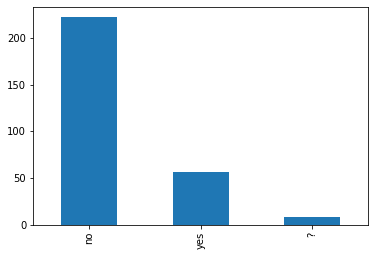

In [ ]:
raw_data['node-caps'].value_counts().plot.bar()
# 2 different node-caps categories found (i.e. 2 distinct values). Mostly no.
# Approach is to use Label Encoder to represent Yes/No category as only 2 categories are present.
# Some missing values that needs to be cleaned

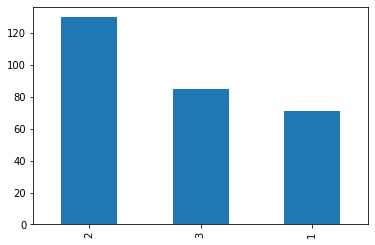

In [ ]:
raw_data['deg-malig'].value_counts().plot.bar()
# 3 different deg-malig categories found (i.e. 3 distinct values)

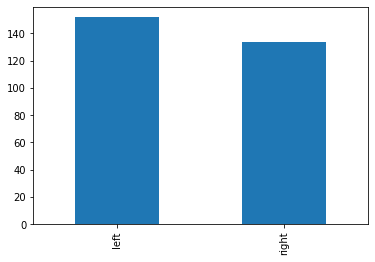

In [ ]:
raw_data['breast'].value_counts().plot.bar()
# 2 different deg-malig categories found (i.e. 2 distinct values)

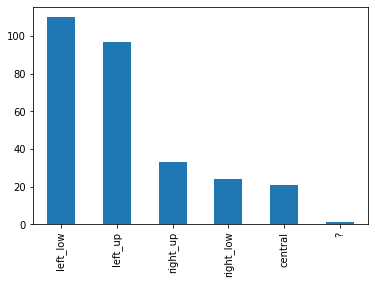

In [ ]:
raw_data['breast-quad'].value_counts().plot.bar()
# 5 different node-caps categories found (i.e. 5 distinct values)
# Some missing values that needs to be cleaned

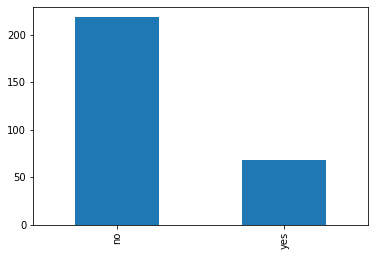

In [ ]:
raw_data['irradiat'].value_counts().plot.bar()
# 2 different deg-malig categories found (i.e. 2 distinct values)

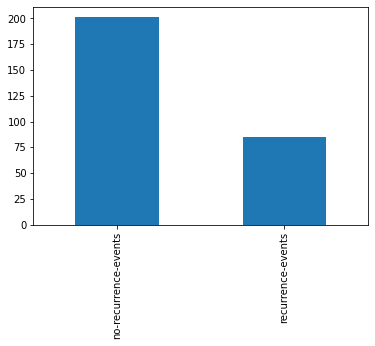

In [ ]:
raw_data['Class'].value_counts().plot.bar()
# 2 different deg-malig categories found (i.e. 2 distinct values)

Create any data pre-processing that you will conduct on seen and unseen data. Regardless of the model you use, this dataframe must contain only numeric features and have a strategy for any expected missing values. Any objects can that are needed to handle the test data that are dependent on the training data can be stored in the model class. You are recommended to use sklearn Pipelines or similar functionality to ensure reproducibility.

In [ ]:
# data cleaning
# approach is to remove index with missing values (i.e. "?") or with a datetime object type
# Goal is to minimise False Negative errors - and incorrect labelling using mean/mode values could impact model performance on unseen data

# preprocessing functions created for test and train data as they are split at the beginning of the process
# main difference is for the test preprocessing, not all columns may be present due to the split hence is added at the end of the step

In [ ]:
def preprocessing_train(raw_data):

  raw_data = raw_data.drop(["inv-nodes"], axis = 1)
  # removing datetime objects from tumor-size
  raw_data = raw_data.drop(raw_data[(raw_data["tumor-size"] == df_tumor_values_timestamp_1) | (raw_data["tumor-size"] == df_tumor_values_timestamp_2) | (raw_data["node-caps"] == "?") | (raw_data['breast-quad'] == "?") ].index )
     
  # changing variables to catagorical values
  # defining the target variable y
  y = raw_data.iloc[:,-1]

  # changing target to catagorical variables using label encoder to obtain an array
  labelencoder = LabelEncoder()
  y = labelencoder.fit_transform(y)

  # changing variables to catagorical values for input variables
  X = raw_data.iloc[:,:8]

  # changing all input variables to catagorical values using pandas get dummies. First column for each input variable dropped to avoid dummy variable trap
  X = X.astype('category')
  X = pd.get_dummies(X, drop_first = True)

  X = X.reindex(sorted(X.columns), axis=1)

  return X, y

In [ ]:
def preprocessing_test(raw_data):
  
  raw_data = raw_data.drop(["inv-nodes"], axis = 1)
  # removing datetime objects from tumor-size
  raw_data = raw_data.drop(raw_data[(raw_data["tumor-size"] == df_tumor_values_timestamp_1) | (raw_data["tumor-size"] == df_tumor_values_timestamp_2) | (raw_data["node-caps"] == "?") | (raw_data['breast-quad'] == "?") ].index )
     
  # changing variables to catagorical values
  # defining the target variable y
  y = raw_data.iloc[:,-1]

  # changing target to catagorical variables using label encoder to obtain an array
  labelencoder = LabelEncoder()
  y = labelencoder.fit_transform(y)

  # changing variables to catagorical values for input variables
  X = raw_data.iloc[:,:8]

  # changing all input variables to catagorical values using pandas get dummies. First column for each input variable dropped to avoid dummy variable trap
  X = X.astype('category')
  X = pd.get_dummies(X, drop_first = True)

  # if columns are not the same size as the x_train columns - add these missing columns
  extra_col = []

  if X_train.shape[1] != X.shape[1]:
    for i in range((X_train.shape[1])):
      if X_train.columns[i] not in X.columns:
        extra_col.append(X_train.columns[i])
 
  if len(extra_col) != 0:
    for i in range(len(extra_col)):
      X[extra_col[i]] = 0

  # sorted to ensure consistent column format to train data
  X = X.reindex(sorted(X.columns), axis=1)

  return X, y

In [ ]:
# Populate preprocess_training_data and preprocess_test_data to preprocess data.
# You must process test and train separately so your model does not accidently gain information that a model wouldnt have in reality and therefore get better predictions

In [ ]:
class Module4_Model:
    
    def __init__(self):
        self.model = None
    
    def train_test_split(self,raw_data):
      train, test = train_test_split(raw_data, test_size = 0.25, random_state = 42)
      return train, test

    def preprocess_training_data(self, train):
      
      X_train, y_train = preprocessing_train(train)
      return X_train, y_train

    def preprocess_test_data(self, test):
      
      X_test, y_test = preprocessing_test(test)
      return  X_test, y_test

In [ ]:
# Dont change
my_model = Module4_Model()

In [ ]:
# Dont change
# data is split before the preprocessing steps are applied
train, test = my_model.train_test_split(raw_data)
# data preprocessing to get train values
X_train, y_train = my_model.preprocess_training_data(train)

In [ ]:
# Create a model

In [ ]:
# First model using a simple logistic regression model

(0.0, 1.0)

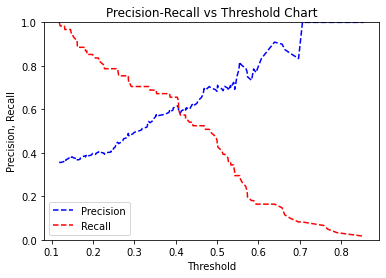

In [ ]:
# Train your model
classifier  = LogisticRegression()
classifier.fit(X_train.values, y_train)

# as we need to reduce the number of false negatives - the precision and recall graphs for different thresholds are shown on the training data
probs_y = classifier.predict_proba(X_train)

precision, recall, thresholds = precision_recall_curve(y_train, probs_y[:, 
1]) 

#retrieve probability of being 1(in second column of probs_y)
pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

# a threshold value of 0.4 is chosen based on the training dataset

In [ ]:
# Dont change - calling test set
X_test, y_test = my_model.preprocess_test_data(test)

# use your model to make a prediction on unseen data
# based on default threshold
y_pred = classifier.predict(X_test.values)

# Asssess the accuracy of your model and explain your key findings
cm = confusion_matrix(y_test, y_pred)
print(cm)
log_report = classification_report(y_test, y_pred)
print(log_report)

[[40  1]
 [15  4]]
              precision    recall  f1-score   support

           0       0.73      0.98      0.83        41
           1       0.80      0.21      0.33        19

    accuracy                           0.73        60
   macro avg       0.76      0.59      0.58        60
weighted avg       0.75      0.73      0.68        60



In [ ]:
# with 0.4 as threshold
threshold = 0.4
y_pred_2  =((classifier.predict_proba(X_test)[:, 1])>= threshold).astype(int)

cm_2 = confusion_matrix(y_test, y_pred_2)
print(cm_2)
log_report_2 = classification_report(y_test, y_pred_2)
print(log_report_2)

[[37  4]
 [10  9]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        41
           1       0.69      0.47      0.56        19

    accuracy                           0.77        60
   macro avg       0.74      0.69      0.70        60
weighted avg       0.76      0.77      0.75        60



In [ ]:
# Accuracy of 77% with the model predicting more accurate in predicting no-recurrence-events than recurrence-events
# increased f1-score for predicting in predicting positive cases when threshold is changed

### Unit tests:

#### Checking training and test data for null values. This will work for both pd dataframes and np arrays, and ensures no null values exist.

In [ ]:
def test_no_nulls(data):
    """ Assert no null values within pd dataframe or np array """
    
    # if data is numpy array, handle accordingly
    if isinstance(data, (np.ndarray)):
        assert not np.isnan(np.min(data))
    
    # if not np array, assume data is pandas dataframe
    else:
        assert data.isna().sum().sum() == 0

In [ ]:
# run null data unit test on both training and test data
test_no_nulls(x_train_processed)
test_no_nulls(x_test_processed)